<a href="https://colab.research.google.com/github/Ranesshtallapelly/Data-analysis-python/blob/main/week7_wednesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy scipy matplotlib


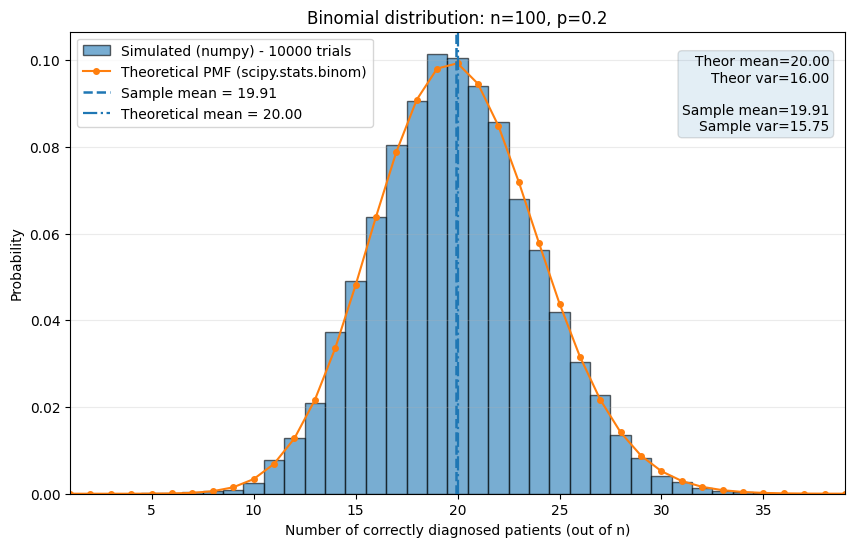

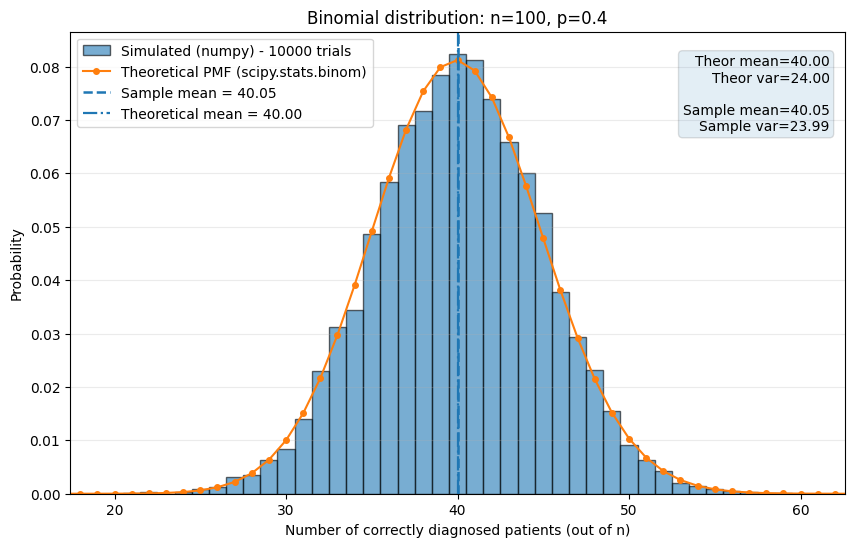

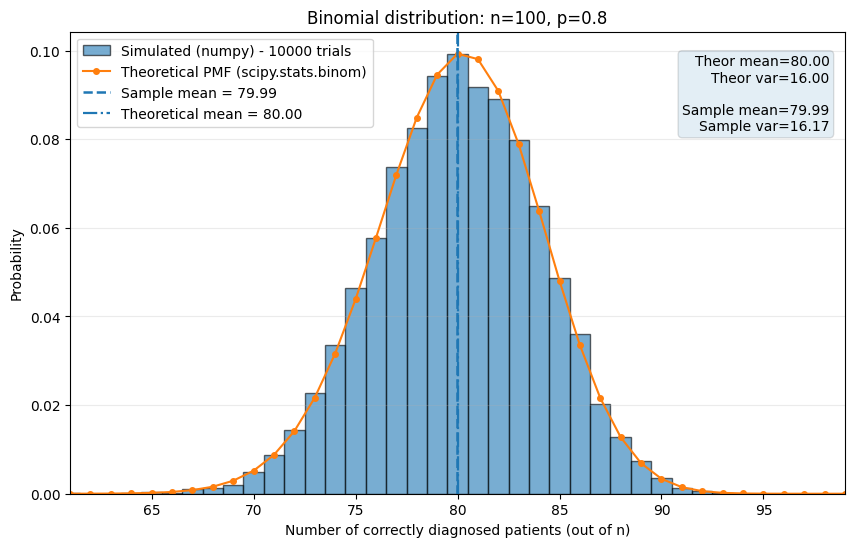


Summary (theoretical vs sample):
     theoretical_mean  theoretical_var  sample_mean  sample_var
p                                                              
0.2              20.0             16.0       19.914      15.746
0.4              40.0             24.0       40.054      23.988
0.8              80.0             16.0       79.992      16.174


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import pandas as pd


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


def simulate_and_plot(n, p, trials=10000, show_plot=True, save_fig=False, fig_name=None):


    samples_numpy = np.random.binomial(n, p, size=trials)
    samples_scipy = binom.rvs(n, p, size=trials)


    k = np.arange(0, n + 1)
    pmf = binom.pmf(k, n, p)

    sample_mean = samples_numpy.mean()
    sample_var = samples_numpy.var(ddof=0)
    theoretical_mean = n * p
    theoretical_var = n * p * (1 - p)


    if show_plot:
        plt.figure(figsize=(10, 6))


        bins = np.arange(-0.5, n + 1.5, 1)
        plt.hist(samples_numpy, bins=bins, density=True, alpha=0.6,
                 edgecolor='black', label=f'Simulated (numpy) - {trials} trials')

        plt.plot(k, pmf, marker='o', linestyle='-', markersize=4,
                 label='Theoretical PMF (scipy.stats.binom)')

        plt.axvline(sample_mean, linestyle='--', linewidth=1.8, label=f'Sample mean = {sample_mean:.2f}')
        plt.axvline(theoretical_mean, linestyle='-.', linewidth=1.6, label=f'Theoretical mean = {theoretical_mean:.2f}')


        textstr = (f"Theor mean={theoretical_mean:.2f}\n"
                   f"Theor var={theoretical_var:.2f}\n\n"
                   f"Sample mean={sample_mean:.2f}\n"
                   f"Sample var={sample_var:.2f}")
        plt.gca().text(0.98, 0.95, textstr, transform=plt.gca().transAxes,
                       fontsize=10, verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', alpha=0.12))

        plt.title(f'Binomial distribution: n={n}, p={p}')
        plt.xlabel('Number of correctly diagnosed patients (out of n)')
        plt.ylabel('Probability')
        plt.xlim(max(0, theoretical_mean - 4 * np.sqrt(theoretical_var) - 3),
                 min(n, theoretical_mean + 4 * np.sqrt(theoretical_var) + 3))
        plt.legend()
        plt.grid(axis='y', alpha=0.25)

        if save_fig and fig_name:
            plt.savefig(fig_name, dpi=150, bbox_inches='tight')
        plt.show()


    return {
        'n': n,
        'p': p,
        'trials': trials,
        'samples_numpy': samples_numpy,
        'samples_scipy': samples_scipy,
        'k': k,
        'pmf': pmf,
        'sample_mean': sample_mean,
        'sample_var': sample_var,
        'theoretical_mean': theoretical_mean,
        'theoretical_var': theoretical_var
    }



def run_all(n=100, ps=(0.2, 0.4, 0.8), trials=10000, save_plots=False):
    results = []
    for p in ps:
        fig_name = f'binomial_n{n}_p{int(p*100)}.png' if save_plots else None
        res = simulate_and_plot(n=n, p=p, trials=trials, show_plot=True,
                                save_fig=save_plots, fig_name=fig_name)
        results.append(res)


    summary_rows = []
    for r in results:
        summary_rows.append({
            'p': r['p'],
            'theoretical_mean': r['theoretical_mean'],
            'theoretical_var': r['theoretical_var'],
            'sample_mean': r['sample_mean'],
            'sample_var': r['sample_var']
        })
    summary_df = pd.DataFrame(summary_rows).set_index('p')
    print("\nSummary (theoretical vs sample):")
    print(summary_df.round(3))
    return results, summary_df



if __name__ == "__main__":

    n = 100
    trials = 10000
    ps = [0.2, 0.4, 0.8]

    results, summary = run_all(n=n, ps=ps, trials=trials, save_plots=False)
